**Q1. What is Gradient Boosting Regression?**

Gradient Boosting Regression is a machine learning algorithm used for regression tasks, where the goal is to predict a continuous output. It belongs to the family of boosting algorithms and is based on the idea of sequentially combining multiple weak learners (typically decision trees) to create a strong predictive model.

The goal of Gradient Boosting Regression is to minimize a loss function by fitting new models to the residual errors at each stage. Initially, the model predicts a simple value (such as the mean of the target variable for regression). After the initial prediction, the algorithm computes the residuals, which are the differences between the true values and the predicted values from the current model. These residuals represent the "errors" or the portion of the target variable that has not been captured by the current model.

A new weak learner (usually a decision tree) is trained to predict the residuals. In other words, the new model tries to learn the mistakes (residuals) made by the previous model.The current model is updated by adding the predictions from the new weak learner to the previous model's predictions. The contribution of the new weak learner is scaled by a factor called the learning rate η, which controls how much the new learner influences the overall model. In each iteration, a new weak learner is added to the model, which tries to further reduce the residuals. After the specified number of iterations, the final model  is a combination of the initial model and all the weak learners added sequentially

**Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.**

In [ ]:
from sklearn.datasets import make_regression
X,y= make_regression(n_samples=1000, n_features=1, n_informative=1, noise=20, random_state=43)

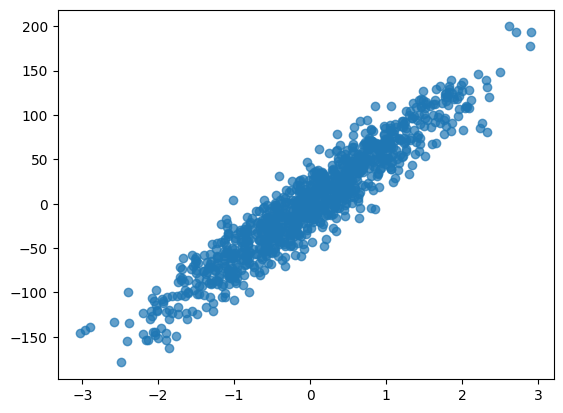

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y,alpha=0.7)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
n_estimators=1000
learning_rate=0.0001

In [ ]:
import numpy as np
ensemble_pred= np.full_like(ytrain,np.mean(ytrain))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
stubs=[]
for i in range (n_estimators):
  residuals= ytrain-ensemble_pred
  tree = DecisionTreeRegressor(max_depth=3)
  tree.fit(Xtrain, residuals)
  stubs.append(tree)
  ensemble_pred += learning_rate * tree.predict(Xtrain)

In [ ]:
y_pred = np.full_like(ytest, np.mean(ytrain))
for i in range(n_estimators):
    y_pred += learning_rate * stubs[i].predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [ ]:
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 3187.654989777736
R-squared: 0.16183925286034295


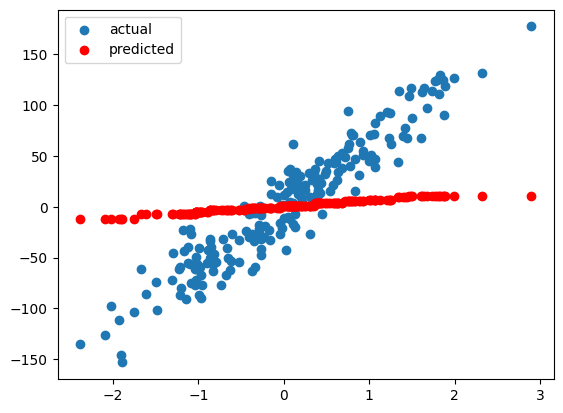

In [ ]:
plt.scatter(Xtest,ytest,label='actual')
plt.scatter(Xtest, y_pred,c='r',label='predicted')
plt.legend()
plt.show()

**Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters.**

In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
X,y=make_regression(n_features=5, n_samples=1000, noise=10, n_informative=3, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
xtrain.shape

(800, 5)

In [8]:
xtest.shape

(200, 5)

In [9]:
param_grid={
    'learning_rate':[0.01,0.1,0.5],
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7]
}

In [11]:
gbm=GradientBoostingRegressor()

gscv=GridSearchCV(gbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [12]:
print('Best parameters: ', gscv.best_params_)
print('Best score: ', gscv.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score:  -161.8266306106957


In [13]:
ypred=gscv.predict(xtest)
mse=mean_squared_error(ytest,ypred)
r2score=r2_score(ytest,ypred)
print('Mean square error: ', mse)
print('R2score: ', r2score)

Mean square error:  148.1089458306762
R2score:  0.9472612195669579


**Q4. What is a weak learner in Gradient Boosting?**

A weak learner in Gradient Boosting is a simple model that performs slightly better than random guessing. The idea is that even though a weak learner may not make highly accurate predictions on its own, multiple weak learners can be combined to create a strong model with high accuracy.

A weak learner is typically a very simple model, often a decision stump. It can be any model that is not highly complex.  In Gradient Boosting, weak learners are added one by one in a sequential manner. Each new weak learner focuses on correcting the errors (residuals) made by the previous learners. By gradually improving on the mistakes, a series of weak learners can be combined to make a strong model.

Since weak learners are simple, they tend to underfit the data, which makes them less likely to overfit (memorize) the training data. When combined in boosting, they can lead to better generalization.

**Q5. What is the intuition behind the Gradient Boosting algorithm?**

The intuition behind the Gradient Boosting algorithm is to build a strong predictive model by sequentially adding weak learners that focus on correcting the errors made by the previous learners. The idea is to boost the model’s performance step by step by minimizing the prediction errors using gradient descent.

Here's a breakdown of the intuition:

- Initially, we make a very basic prediction, often just a constant value like the mean of the target values in the case of regression. This prediction is usually not very good, but it serves as a starting point.
- After making the initial prediction, we look at how much error (also called residual) is left — this is the difference between the actual target values and the current predictions. We then train a simple model (a weak learner, often a decision stump) to predict these residual errors. This weak learner focuses on the parts where the initial model performed poorly.
- The new weak learner is added to the overall model, which improves the prediction by correcting some of the mistakes made by the initial model. The current predictions are updated by adding the weak learner’s predictions to them, but scaled by a learning rate to control the size of the updates.
- We then compute the new residuals (errors that remain after the previous update) and fit another weak learner to those residuals.
Each new weak learner is trained to fix the errors left by the previous model.
The process is repeated for a certain number of iterations, each time improving the model by focusing on the mistakes from the previous step.
- Over many iterations, the model becomes stronger because each weak learner adds a little improvement by correcting more of the errors. The boosting process turns many simple, weak models into a highly accurate predictive model by iteratively reducing the errors.

**Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?**

The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential and iterative manner. At each iteration, the algorithm trains a new weak learner that can improve the accuracy of the current ensemble, and then adds it to the ensemble in a weighted manner.

The general steps of the Gradient Boosting algorithm are:

1. Initialize the ensemble by fitting a single weak learner (e.g., a decision tree) to the data and making a prediction based on the input features.

2. Compute the difference between the predicted values and the true target values, which is called the residual.

3. Train a new weak learner to predict the residual (i.e., the difference between the predicted and true values) instead of the original target variable. This new learner is fit to the negative gradient of the loss function with respect to the current predictions of the ensemble, which gives it a clear direction for improving the predictions.

4. Add the new weak learner to the ensemble by combining it with the previous learners in a weighted manner. The weights of the previous learners are adjusted to give more weight to the models that made larger contributions to the prediction.

5. Repeat steps 2-4 until a stopping criterion is met (e.g., a maximum number of iterations, a minimum improvement in accuracy, or the presence of overfitting).

By iteratively adding new weak learners to the ensemble and adjusting the weights of the previous learners, the Gradient Boosting algorithm can create a highly accurate and robust prediction model. The ensemble of weak learners can capture complex nonlinear relationships between the input features and the target variable, while the iterative learning process can gradually refine the predictions and reduce the residual error.

Overall, the Gradient Boosting algorithm is an effective way to build an ensemble of weak learners and create a strong prediction model that can generalize well to new data.

**Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?**

Gradient Boosting is a popular machine learning algorithm used for both regression and classification tasks. Here are the steps involved in constructing the mathematical intuition of Gradient Boosting:

1. Define the problem: Define the problem you want to solve using Gradient Boosting, whether it's a regression or classification task.
2. Define the loss function: The loss function is a measure of how well the algorithm is doing in fitting the training data. In Gradient Boosting, we typically use a differentiable loss function such as mean squared error for regression or log loss for classification.
3. Create an initial model: Create an initial model to make predictions. This model can be as simple as the mean of the target variable or a linear regression model.
4. Calculate the residual errors: Calculate the residual errors by subtracting the predictions of the initial model from the actual values of the target variable.
5. Train a new model on the residual errors: Train a new model on the residual errors from the previous step. This model is usually a decision tree with a fixed depth.
6. Add the predictions of the new model to the previous predictions: Add the predictions of the new model to the previous predictions to update the model. This process is called boosting because we are boosting the performance of the model by adding new models to it.
7. Repeat steps 4 to 6 until convergence: Repeat steps 4 to 6 until the model converges or until a stopping criterion is met. The stopping criterion can be a maximum number of models, a threshold for the improvement of the loss function, or a maximum depth for the decision trees.
8. Make predictions: Use the final model to make predictions on new data.

Overall, Gradient Boosting works by iteratively improving the model by adding new models to correct the errors of the previous models. This process continues until the model converges or a stopping criterion is met.